In [2]:
import numpy as np
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.models import Model
from keras.layers import GlobalAveragePooling2D

import zipfile
import os

In [3]:
!wget -O cats_and_dogs_filtered.zip  "https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"

--2024-02-06 11:31:24--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.134.207, 74.125.141.207, 173.194.210.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.134.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M   193MB/s    in 0.3s    

2024-02-06 11:31:24 (193 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [4]:
# Extract the contents of the ZIP file
with zipfile.ZipFile("cats_and_dogs_filtered.zip", "r") as zip_ref:
    zip_ref.extractall("data")

In [6]:
from PIL import Image

# Open the JPEG image
train_cat_VGG = []
train_dog_VGG = []
num_test = 500;
for i in range(2*num_test):
  if i%10 == 0:
    print("i = ",i)
  link_train_cat_VGG = "data/cats_and_dogs_filtered/train/cats/cat."+str(i)+".jpg"
  train_cat_VGG.append(feature(link_train_cat_VGG));


for i in range(2*num_test):
  if i%10 == 0:
    print("i = ",i)
  link_train_dog_VGG = "data/cats_and_dogs_filtered/train/dogs/dog."+str(i)+".jpg"
  train_dog_VGG.append(feature(link_train_dog_VGG));


i =  0
1/1 [==============================] - 1s 875ms/step
Shape of last layer features: (1, 512)
1/1 [==============================] - 1s 1s/step
Shape of last layer features: (1, 512)
1/1 [==============================] - 1s 664ms/step
Shape of last layer features: (1, 512)
1/1 [==============================] - 1s 660ms/step
Shape of last layer features: (1, 512)


1/1 [==============================] - 1s 648ms/step
Shape of last layer features: (1, 512)


1/1 [==============================] - 1s 904ms/step
Shape of last layer features: (1, 512)
1/1 [==============================] - 1s 1s/step
Shape of last layer features: (1, 512)
1/1 [==============================] - 1s 677ms/step
Shape of last layer features: (1, 512)
1/1 [==============================] - 1s 648ms/step
Shape of last layer features: (1, 512)
1/1 [==============================] - 1s 958ms/step
Shape of last layer features: (1, 512)
i =  10
1/1 [==============================] - 1s 1s/step
Shape of last layer features: (1, 512)
1/1 [==============================] - 1s 640ms/step
Shape of last layer features: (1, 512)
1/1 [==============================] - 1s 654ms/step
Shape of last layer features: (1, 512)
1/1 [==============================] - 1s 649ms/step
Shape of last layer features: (1, 512)
1/1 [==============================] - 1s 680ms/step
Shape of last layer features: (1, 512)
1/1 [==============================] - 1s 656ms/step
Shape of last layer featu

In [28]:
test_cat_VGG = []
test_dog_VGG = []
num_test = 500;

for i in np.arange(2000,2500):
  if i%10 == 0:
    print("i = ",i)
  link_test_cat_VGG = "data/cats_and_dogs_filtered/validation/cats/cat."+str(i)+".jpg"
  test_cat_VGG.append(feature(link_test_cat_VGG));

for i in np.arange(2000,2500):
  if i%10 == 0:
    print("i = ",i)
  link_test_dog_VGG = "data/cats_and_dogs_filtered/validation/dogs/dog."+str(i)+".jpg"
  test_dog_VGG.append(feature(link_test_dog_VGG));

i =  2000
1/1 [==============================] - 1s 747ms/step
Shape of last layer features: (1, 512)
1/1 [==============================] - 1s 698ms/step
Shape of last layer features: (1, 512)
1/1 [==============================] - 1s 664ms/step
Shape of last layer features: (1, 512)
1/1 [==============================] - 1s 716ms/step
Shape of last layer features: (1, 512)
1/1 [==============================] - 1s 1s/step
Shape of last layer features: (1, 512)
1/1 [==============================] - 1s 727ms/step
Shape of last layer features: (1, 512)
1/1 [==============================] - 1s 888ms/step
Shape of last layer features: (1, 512)
1/1 [==============================] - 1s 678ms/step
Shape of last layer features: (1, 512)
1/1 [==============================] - 1s 660ms/step
Shape of last layer features: (1, 512)
1/1 [==============================] - 1s 658ms/step
Shape of last layer features: (1, 512)
i =  2010
1/1 [==============================] - 1s 643ms/step
Shape of l

In [5]:
def feature(img_path):
  # Load the ResNet101 model with weights pre-trained on ImageNet
  base_model = VGG16(weights='imagenet', include_top=False);

  # Add Global Average Pooling layer
  x = GlobalAveragePooling2D()(base_model.output);

  # Create a model that includes the ResNet101 base model and GAP layer
  model = Model(inputs=base_model.input, outputs=x);

  # Load an example image (replace 'path/to/your/image.jpg' with the actual path)

  img = image.load_img(img_path, target_size=(224, 224));
  img_array = image.img_to_array(img);
  img_array = np.expand_dims(img_array, axis=0);
  img_array = preprocess_input(img_array);

  # Get the features from the last layer
  last_layer_features = model.predict(img_array);
  # Display the shape of the last layer features
  print("Shape of last layer features:", last_layer_features.shape)
  return last_layer_features

In [29]:
X_train = np.array(train_cat_VGG + train_dog_VGG);
X_train = np.reshape(X_train,[X_train.shape[0],-1]);
print(X_train.shape)

X_test = np.array(test_cat_VGG + test_dog_VGG);
X_test = np.reshape(X_test,[X_test.shape[0],-1]);
print(X_test.shape)

y_train = np.concatenate((np.array(np.ones(1000)), np.array(np.zeros(1000))))
y_test =np.concatenate((np.array(np.ones(500)), np.array(np.zeros(500))))


(2000, 512)
(1000, 512)


(100, 512)

In [30]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Train the SVM classifier
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = svm_classifier.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)*100
print("Accuracy Using VGG:", accuracy)

Accuracy Using VGG: 98.0


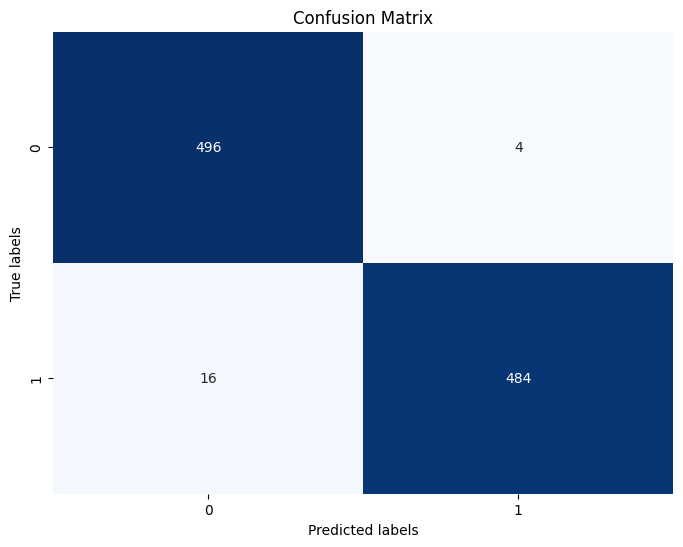

In [31]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have trained your SVM classifier and obtained predictions
# Replace y_true with true labels and y_pred with predicted labels
# y_true and y_pred should be arrays of the same length containing the true and predicted labels, respectively

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [36]:
np.save('/Users/parniantaheri/Desktop/temp/class/term 7/یادگیری در مغز و ماشین ۱/HW/HW6/y_predVGG', y_pred)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/parniantaheri/Desktop/temp/class/term 7/یادگیری در مغز و ماشین ۱/HW/HW6/y_predVGG.npy'